In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append("..")

In [3]:
from rom_tools.rom_manager import RomManager
from world_rando.parse_rules import parse_rules, make_level_from_room
from world_rando.coord import Coord

In [4]:
from data_types.item_set import ItemSet

In [5]:
manager = RomManager("../../roms/sm_clean.smc", "../../roms/sm_junk.smc")
obj_names = manager.parse() # slow
header = obj_names["room_header_0x79e9f"]
level = make_level_from_room(header)

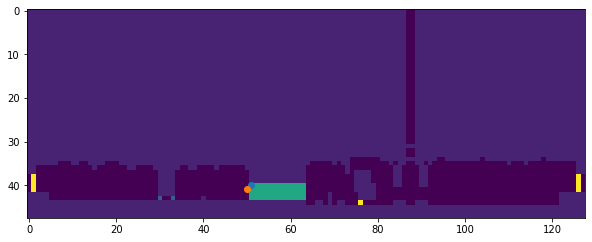

In [6]:
figure(figsize=(10,10));
scatter(51,40)
scatter(50,41)
imshow(level.level.T);

In [7]:
rules, tests = parse_rules(["../encoding/rules/rules.yaml"])
start_state = tests['TestWalk'][0]
start_state.level = level
start_state.level.liquid_level = 256
start_state.samus.position = Coord(50,41)

In [8]:
start_state.samus

(c(50,41)|V: 0, H: RUN, 0|STAND|ISet([]))

In [9]:
next_state = rules["Step"].apply(start_state, debug=True)[0]

Applying Rule: Step
(c(50,41)|V: 0, H: RUN, 0|STAND|ISet([]))
Collided
(c(50,41)|V: 0, H: RUN, 0|STAND|ISet([]))
New:
(c(50,41)|V: 0, H: RUN, 0|STAND|ISet([]))


In [10]:
#TODO: get SearchState.copy() working
_, tests2 = parse_rules(["../encoding/rules/rules.yaml"])
start_state2 = tests2['TestWalk'][0]
start_state2.level = level
start_state2.level.liquid_level = 256
start_state2.samus.position = Coord(50,41)
start_state2.samus.items = start_state.samus.items | ItemSet(["MB", "PB"])

In [11]:
next_state2 = rules["Step"].apply(start_state2, debug=True)[0]

Applying Rule: Step
(c(50,41)|V: 0, H: RUN, 0|STAND|ISet(['PB', 'MB']))
New:
(c(51,41)|V: 0, H: RUN, 0|STAND|ISet(['PB', 'MB']))


In [12]:
type(next_state.samus.velocity)

world_rando.rules.Velocity

In [13]:
vf = rules["Step"].state_function.vfunction

In [14]:
vf.as_tla()

VClauses(domain='((vv_prev >= 0 & vv_prev <= 0 & vh_prev >= 0 & vh_prev <= 0 & (vt_prev = 1)))', vv='vv_next = 0 + 0', vh='vh_next = 0 + 0', vt='vt_next = 1')

In [15]:
vf.domain.as_tla()

'(vv_prev >= 0 & vv_prev <= 0 & vh_prev >= 0 & vh_prev <= 0 & (vt_prev = 1))'

In [16]:
step = rules["Step"]

In [17]:
step.state_function.as_tla(start_state.samus.position, level.items)

SFClauses(pos_prev='(x_prev = 50 & y_prev = 41)', pos_next='(x_next = 51 & y_next = 41)', pose_prev='pose_prev = 0', pose_next='pose_next = 0', item='(B_prev = B_next & PB_prev = PB_next & SPB_prev = SPB_next & S_prev = S_next & M_prev = M_next & G_prev = G_next & SA_prev = SA_next & V_prev = V_next & GS_prev = GS_next & SB_prev = SB_next & HJ_prev = HJ_next & MB_prev = MB_next & CB_prev = CB_next & WB_prev = WB_next & E_prev = E_next & PLB_prev = PLB_next & Spazer_prev = Spazer_next & RT_prev = RT_next & XR_prev = XR_next & IB_prev = IB_next & SJ_prev = SJ_next & Kraid_prev = Kraid_next & Phantoon_prev = Phantoon_next & Draygon_prev = Draygon_next & Ridley_prev = Ridley_next & Botwoon_prev = Botwoon_next & Spore_Spawn_prev = Spore_Spawn_next & Golden_Torizo_prev = Golden_Torizo_next & Bomb_Torizo_prev = Bomb_Torizo_next & Mother_Brain_prev = Mother_Brain_next & Crocomire_prev = Crocomire_next & Ceres_Ridley_prev = Ceres_Ridley_next & Drain_prev = Drain_next & Shaktool_prev = Shaktool_

In [18]:
213 * 6000 * len(rules)

60066000

In [19]:
from world_rando.rules import *

In [20]:
tla_tile_clause(level, Coord(0,0), Coord(0,0), AbstractTile.SOLID)

''

In [21]:
get_tile(level, Coord(0,0), Coord(51,41))

7

In [22]:
tla_tile_clause(level, Coord(0,0), Coord(51,41), AbstractTile.AIR)

'(PB_prev = 1 & MB_prev = 1)'

In [23]:
block_solid_requirements

{<AbstractTile.SOLID: 2>: [(<world_rando.rules.VelocitySet at 0x7fc8a78d34c0>,
   ISet([]),
   {<SamusPose.STAND: 0>,
    <SamusPose.MORPH: 1>,
    <SamusPose.JUMP: 2>,
    <SamusPose.SPIN: 3>})],
 <AbstractTile.BLOCK_CRUMBLE: 10>: 'Reciprocal',
 <AbstractTile.BLOCK_SHOT: 11>: [(<world_rando.rules.VelocitySet at 0x7fc8a78d34c0>,
   ISet([]),
   {<SamusPose.STAND: 0>,
    <SamusPose.MORPH: 1>,
    <SamusPose.JUMP: 2>,
    <SamusPose.SPIN: 3>})]}

In [24]:
p = Coord(50,41)
o = Coord(0,0)
samus_occupies_air_tla(p, SamusPose.STAND, o, level)

''

In [25]:
#step.as_tla(start_state.samus.position, level.items)

In [26]:
rules["Step"].level_transition.state_list
# IntermediateState
#  pos: Coord
#  walls: [coord]
#  airs: [Coord]
#  samusfunction: Option(Samusfunction)

In [27]:
# conflict_ds: Direction -> Clause
#   Clause describes necessary prior conditions
# collide_outcomes -> [(Clause, Pos, Pose)]
#   Clause describes necessary outcomes

In [28]:
#item_c

In [29]:
fall0 = rules["Fall0"]
fall1 = rules["Fall1"]
pp = Coord(100,41)

In [30]:
fall0e = fall0.level_transition.as_tla(pp, level, debug=True)

Iteration 0
c(100,41)
(x_next = 100 & y_next = 41)
Walls: []
Airs: [(c(1,0), [c(1,0), c(1,1), c(1,2)]), (c(0,1), [])]
['', '']
{}
Iteration 1
c(101,41)
(x_next = 101 & y_next = 41)
Walls: []
Airs: [(c(1,0), []), (c(0,1), [])]
['', '', '', '']
{}
Outcomes:
Outcome 0: ((x_next = 101 & y_next = 41) & pose_next = 2 & ((vv_next = vv_prev + 1 | vv_prev = 1 & vv_next = 1) & vh_next = 0 + 0 & vt_next = 1))


In [31]:
sf_clauses = step.state_function.as_tla(p, level.items)
pos_prev_c, pos_next_c, pose_prev_c, pose_next_c, item_c, v_clauses = sf_clauses
domain_c, vv_c, vh_c, vt_c = v_clauses

In [32]:
expr = step.level_transition.as_tla(p, level, debug=True)

Iteration 0
c(50,41)
(x_next = 50 & y_next = 41)
Walls: [c(0,3)]
Airs: [(c(1,0), [c(1,0), c(1,1), c(1,2)]), (c(0,1), [])]
['', '']
{c(1,0): '(~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)))'}
Iteration 1
c(51,41)
(x_next = 51 & y_next = 41)
Walls: [c(0,3)]
Airs: [(c(1,0), []), (c(0,1), [])]
['', '', '~((~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1))))', '((PB_prev = 1 & MB_prev = 1) & (PB_prev = 1 & MB_prev = 1) & (PB_prev = 1 & MB_prev = 1))', '']
{}
Outcomes:
Outcome 0: ((x_next = 50 & y_next = 41) & pose_next = 0 & (vt_next = 1 & vh_next = 0 & vv_next = 0 + 0 & (~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)))))
Outcome 1: ((x_next = 51 & y_next = 41) & pose_next = 0 & (vv_next = 0 + 0 & vh_next = 0 + 0 & vt_next = 1) & (~((~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)) | ~((PB_prev = 1 & MB_prev = 1)))) & ((PB_prev = 1

In [33]:
expr

'((x_prev = 50 & y_prev = 41) & pose_prev = 0 & ((vv_prev >= 0 & vv_prev <= 0 & vh_prev >= 0 & vh_prev <= 0 & (vt_prev = 1))) & (B_prev = B_next & PB_prev = PB_next & SPB_prev = SPB_next & S_prev = S_next & M_prev = M_next & G_prev = G_next & SA_prev = SA_next & V_prev = V_next & GS_prev = GS_next & SB_prev = SB_next & HJ_prev = HJ_next & MB_prev = MB_next & CB_prev = CB_next & WB_prev = WB_next & E_prev = E_next & PLB_prev = PLB_next & Spazer_prev = Spazer_next & RT_prev = RT_next & XR_prev = XR_next & IB_prev = IB_next & SJ_prev = SJ_next & Kraid_prev = Kraid_next & Phantoon_prev = Phantoon_next & Draygon_prev = Draygon_next & Ridley_prev = Ridley_next & Botwoon_prev = Botwoon_next & Spore_Spawn_prev = Spore_Spawn_next & Golden_Torizo_prev = Golden_Torizo_next & Bomb_Torizo_prev = Bomb_Torizo_next & Mother_Brain_prev = Mother_Brain_next & Crocomire_prev = Crocomire_next & Ceres_Ridley_prev = Ceres_Ridley_next & Drain_prev = Drain_next & Shaktool_prev = Shaktool_next & START_prev = ST

In [34]:
from data_types.item_set import item_mapping

In [35]:
rule_name_ids = {r:i for i,r in enumerate(rules.keys())}
pose_ids = {p:i for i,p in enumerate(SamusPose)}

In [36]:
def mk_replace(context, before, after):
    replace_dict = {}
    for k in context.vars.keys():
        if k.endswith(before):
            replace_dict[k] = k.replace(before, after)
    return replace_dict

In [37]:
# ITE(tile_reach(x,y),tile_reach(x,y),node_reach(x,y)) 
# node_reach
# TLA for node_reach

In [38]:
from omega.symbolic.fol import Context

`omega.symbolic.symbolic` failed to import `dd.cudd`.
Will use `dd.autoref`.


In [39]:
context = Context()
context.declare(
    rule = (0,len(rules.keys())-1),

    x_prev = (0,level.shape[0]-1),
    x_next = (0,level.shape[0]-1),

    y_prev = (0,level.shape[1]-1),
    y_next = (0,level.shape[1]-1),

    pose_prev = (0,len(SamusPose)-1),
    pose_next = (0,len(SamusPose)-1),
    
    vt_prev = (0, len(VType)),
    vt_next = (0, len(VType)),
    
    vh_prev = (-30, 30),
    vh_next = (-30, 30),
    
    vv_prev = (-15, 1),
    vv_next = (-15, 1),
)
# Try to get a favorable variable ordering
shared_dict = {}
for i in item_mapping:
  shared_dict[f"{i}_prev"] = (0,1)
  shared_dict[f"{i}_next"] = (0,1)
context.declare(**shared_dict)

In [40]:
def translate_iset(itemset, fstr="{}"):
    d = {}
    for i in item_mapping:
        if i in itemset:
            d[fstr.format(i)] = 1
        #else:
        #  d[fstr.format(i)] = 0
    return d

In [41]:
#context.vars

In [42]:
trans_test = context.false

In [43]:
trans_test |= context.add_expr(expr)

In [44]:
trans_test.count()

68719476736

In [45]:
nonxy_vars = list(filter(lambda x: x != "x_prev" and x != "y_prev", context.vars.keys()))
nonxy_vars2 = list(filter(lambda x: x != "x_next" and x != "y_next", context.vars.keys()))

In [46]:
posns = context.exist(nonxy_vars2, trans_test)

In [47]:
model_posns = [(a["x_next"], -a["y_next"]) for a in context.pick_iter(posns)]

In [48]:
model_posns

[(50, -41), (51, -41)]

In [49]:
## The big loop

In [50]:
import itertools

In [51]:
from tqdm.notebook import tqdm

In [52]:
trans = context.false
for i,(x,y) in tqdm(enumerate(itertools.product(range(level.shape[0]), range(level.shape[1]))), total=level.shape[0] * level.shape[1]):
    c = Coord(x, y)
    for name, rule in rules.items():
        #print(c, name)
        expr = rule.level_transition.as_tla(c, level)
        if expr:
            #print(c, name)
            #print(expr)
            #TODO: context.define(items_unchanged)
            #TODO: pass context to as_tla and produce a BDD
            trans |= context.add_expr(expr)

  0%|          | 0/6144 [00:00<?, ?it/s]

In [53]:
name, c

('SpinLand_hf', c(127,47))

In [54]:
isl = rules["GetItemMorph"].level_transition.state_list

In [55]:
[i.pos for i in isl]

[c(0,0)]

In [56]:
expr = rules["GetItemMorph"].level_transition.as_tla(c, level, debug=True)

In [57]:
trans.count()

2070483474317312

In [58]:
posns = context.exist(nonxy_vars, trans)

In [59]:
model_posns = [(a["x_prev"], -a["y_prev"]) for a in context.pick_iter(posns)]

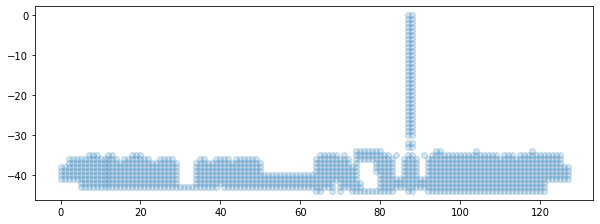

In [60]:
figure(figsize=(10,10))
scatter(*array(model_posns).T, alpha=0.2)
gca().set_aspect('equal');

In [61]:
rule_name_ids

{'Step': 0,
 'Step_hf': 1,
 'StepUp': 2,
 'StepUp_hf': 3,
 'StepDown': 4,
 'StepDown_hf': 5,
 'Morph': 6,
 'Unmorph': 7,
 'MorphStep': 8,
 'MorphStep_hf': 9,
 'BombJump': 10,
 'MorphFallOff': 11,
 'MorphFallOff_hf': 12,
 'MorphFall0': 13,
 'MorphFall0_hf': 14,
 'MorphFall1': 15,
 'MorphLand': 16,
 'GetItemMorph': 17,
 'GetItemMorph_hf': 18,
 'GetItem0': 19,
 'GetItem0_hf': 20,
 'GetItem1': 21,
 'GetItem1_hf': 22,
 'GetItem2': 23,
 'GetItem2_hf': 24,
 'GetItem0J': 25,
 'GetItem0J_hf': 26,
 'GetItem1J': 27,
 'GetItem1J_hf': 28,
 'GetItem2J': 29,
 'GetItem2J_hf': 30,
 'Jump': 31,
 'Jump_hf': 32,
 'JumpRight': 33,
 'JumpRight_hf': 34,
 'FallOff': 35,
 'FallOff_hf': 36,
 'Fall0': 37,
 'Fall0_hf': 38,
 'Fall1': 39,
 'SpinFall0': 40,
 'SpinFall0_hf': 41,
 'SpinFall1': 42,
 'Land': 43,
 'Land_hf': 44,
 'SpinLand': 45,
 'SpinLand_hf': 46}

In [62]:
## Composing trans with itself
context2 = Context()
context2.declare(

    x_prev = (0,level.shape[0]-1),
    x_next = (0,level.shape[0]-1),
    x_temp = (0,level.shape[0]-1),

    y_prev = (0,level.shape[1]-1),
    y_next = (0,level.shape[1]-1),
    y_temp = (0,level.shape[1]-1),

    pose_prev = (0,len(SamusPose)-1),
    pose_next = (0,len(SamusPose)-1),
    pose_temp = (0,len(SamusPose)-1),
    
    vt_prev = (0, len(VType)),
    vt_next = (0, len(VType)),
    vt_temp = (0, len(VType)),
    
    vh_prev = (-30, 30),
    vh_next = (-30, 30),
    vh_temp = (-30, 30),
    
    vv_prev = (-15, 1),
    vv_next = (-15, 1),
    vv_temp = (-15, 1),
)
# Try to get a favorable variable ordering
shared_dict = {}
for i in item_mapping:
    shared_dict[f"{i}_prev"] = (0,1)
    shared_dict[f"{i}_next"] = (0,1)
    shared_dict[f"{i}_temp"] = (0,1)
context2.declare(**shared_dict)

In [63]:
# Project over "rule" since many different rules will be used in the transitive closure
trans_norule = context.copy(context.exist(["rule"], trans), context2)

In [64]:
# Have: trans(prev, next)
# Want: trans(temp, next)
# Have: closure(prev, next)
# Want: closure(prev, temp)
prev_to_temp = mk_replace(context2, "prev", "temp")
next_to_temp = mk_replace(context2, "next", "temp")
temps = [k for k in context2.vars.keys() if k.endswith("_temp")]

In [ ]:
# Iterative squaring
n = 0
closure = trans_norule
closure_last = context2.false
while closure != closure_last:
    closure_last = closure
    closure_prev_temp = context2.let(next_to_temp, closure_last)
    closure_temp_next = context2.let(prev_to_temp, closure_last)
    closure |= context2.exist(temps, closure_prev_temp & closure_temp_next)
    print(n, closure.dag_size)
    n+=1
closure_square = closure

0 8941
1 24013
2 59752
3 104883
4 133875


In [ ]:
x_expr = closure & context2.add_expr("x_prev = 64 & y_prev = 42 & pose_prev = 0 & MB_prev = 1 & PB_prev = 1")
nexts = [k for k in context2.vars.keys() if k.endswith("_next")]
prevs = [k for k in context2.vars.keys() if k.endswith("_prev")]
xx = context2.pick(context2.exist(nexts, x_expr), prevs)

In [ ]:
xx

In [ ]:
xx_bdd = context2.assign_from(xx)
reachable = xx_bdd & closure
reachable.count()
model_posns = [(a["x_next"], -a["y_next"]) for a in context2.pick_iter(reachable)]

In [ ]:
figure(figsize=(10,10))
scatter(*array(model_posns).T, alpha=0.2)
scatter(64,-42)
gca().set_aspect('equal');

In [ ]:
figure(figsize=(10,10))
imshow(level.level.T);
scatter(64,42)

In [ ]:
#TODO: Debug falling rule

In [ ]:
#obj_names["room_header_0x79e9f"].door_list.list[0][1].to_room

In [ ]:
header2 = obj_names["room_header_0x79f11"]
level2 = make_level_from_room(header2)

In [ ]:
figure(figsize=(10,10))
imshow(level2.level.T);

In [ ]:
fall0 = rules["Fall0"]
fall1 = rules["Fall1"]
pp = Coord(100,41)

In [ ]:
fall0e = fall0.level_transition.as_tla(pp, level, debug=True)

In [ ]:
fall0e

In [ ]:
fall1e = fall0.level_transition.as_tla(pp, level, debug=True)

In [ ]:
fall1e